<a href="https://colab.research.google.com/github/caseynv/SVM-project/blob/master/SVM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load data from datasource, url
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00252/pop_failures.dat"
df = pd.read_csv(url, sep='\s+')
df

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,176,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,...,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706,1
536,3,177,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,...,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565,0
537,3,178,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,...,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817,1
538,3,179,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,...,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535,1


In [4]:
# Display basic information about the DataFrame
print("Data Types:")
print(df.dtypes)

Data Types:
Study                     int64
Run                       int64
vconst_corr             float64
vconst_2                float64
vconst_3                float64
vconst_4                float64
vconst_5                float64
vconst_7                float64
ah_corr                 float64
ah_bolus                float64
slm_corr                float64
efficiency_factor       float64
tidal_mix_max           float64
vertical_decay_scale    float64
convect_corr            float64
bckgrnd_vdc1            float64
bckgrnd_vdc_ban         float64
bckgrnd_vdc_eq          float64
bckgrnd_vdc_psim        float64
Prandtl                 float64
outcome                   int64
dtype: object


In [5]:
# indicating if the values are NA/nan
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Study                   0
Run                     0
vconst_corr             0
vconst_2                0
vconst_3                0
vconst_4                0
vconst_5                0
vconst_7                0
ah_corr                 0
ah_bolus                0
slm_corr                0
efficiency_factor       0
tidal_mix_max           0
vertical_decay_scale    0
convect_corr            0
bckgrnd_vdc1            0
bckgrnd_vdc_ban         0
bckgrnd_vdc_eq          0
bckgrnd_vdc_psim        0
Prandtl                 0
outcome                 0
dtype: int64


In [6]:
#descriptive statistics
print("\nSummary Statistics:")
#this can also be used to check for outliers from the mean and the maximum value
print(df.describe())


Summary Statistics:
            Study         Run  vconst_corr    vconst_2    vconst_3  \
count  540.000000  540.000000   540.000000  540.000000  540.000000   
mean     2.000000   90.500000     0.500026    0.500097    0.500027   
std      0.817254   52.008901     0.288939    0.288922    0.289067   
min      1.000000    1.000000     0.000414    0.001922    0.001181   
25%      1.000000   45.750000     0.249650    0.251597    0.251540   
50%      2.000000   90.500000     0.499998    0.499595    0.500104   
75%      3.000000  135.250000     0.750042    0.750011    0.749180   
max      3.000000  180.000000     0.999194    0.998815    0.998263   

         vconst_4    vconst_5    vconst_7     ah_corr    ah_bolus  ...  \
count  540.000000  540.000000  540.000000  540.000000  540.000000  ...   
mean     0.500119    0.500001    0.499913    0.500059    0.500076  ...   
std      0.288993    0.288827    0.288852    0.289010    0.288909  ...   
min      0.001972    0.000858    0.000476    0.00459

In [21]:
#returns information about the data
print(df.info())

#returns the number of unique values for each column
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vconst_corr           540 non-null    float64
 1   vconst_2              540 non-null    float64
 2   vconst_3              540 non-null    float64
 3   vconst_4              540 non-null    float64
 4   vconst_5              540 non-null    float64
 5   vconst_7              540 non-null    float64
 6   ah_corr               540 non-null    float64
 7   ah_bolus              540 non-null    float64
 8   slm_corr              540 non-null    float64
 9   efficiency_factor     540 non-null    float64
 10  tidal_mix_max         540 non-null    float64
 11  vertical_decay_scale  540 non-null    float64
 12  convect_corr          540 non-null    float64
 13  bckgrnd_vdc1          540 non-null    float64
 14  bckgrnd_vdc_ban       540 non-null    float64
 15  bckgrnd_vdc_eq        5

<Axes: xlabel='variable', ylabel='value'>

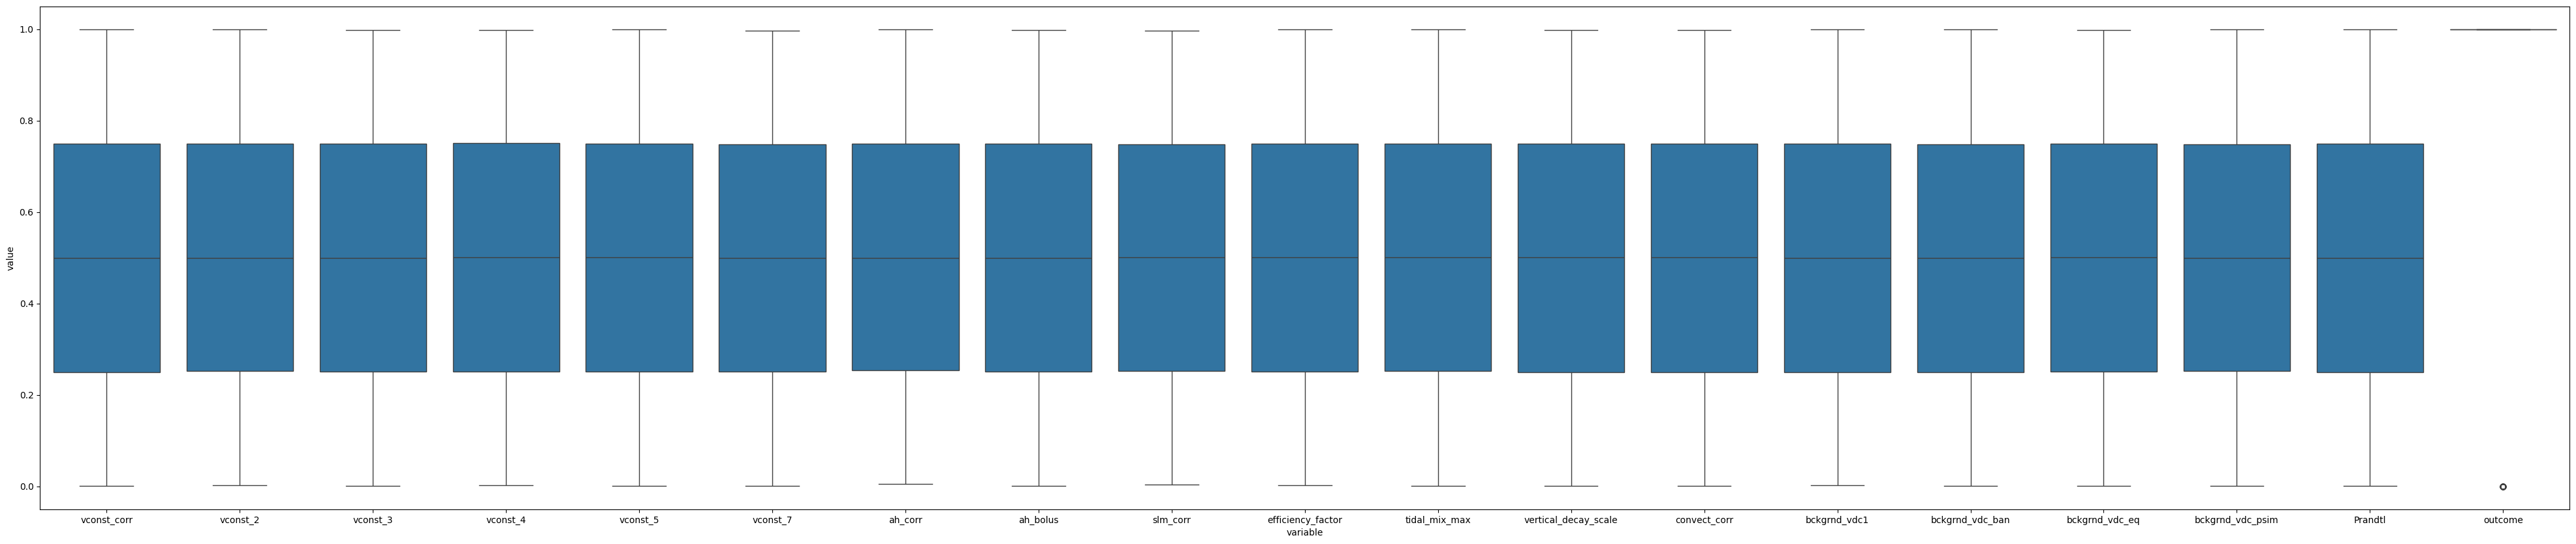

In [20]:
#this is used to visualise the data and check for outliers
plt.figure(figsize = (50,10))
sns.boxplot(data = df.melt(),
            x = 'variable',
            y = 'value' )

In [9]:
# Remove the first two columns
df = df.iloc[:, 2:]

# Display the DataFrame after removing the first two columns
print(df)


DataFrame after removing the first two columns:
     vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  vconst_7   ah_corr  \
0       0.859036  0.927825  0.252866  0.298838  0.170521  0.735936  0.428325   
1       0.606041  0.457728  0.359448  0.306957  0.843331  0.934851  0.444572   
2       0.997600  0.373238  0.517399  0.504993  0.618903  0.605571  0.746225   
3       0.783408  0.104055  0.197533  0.421837  0.742056  0.490828  0.005525   
4       0.406250  0.513199  0.061812  0.635837  0.844798  0.441502  0.191926   
..           ...       ...       ...       ...       ...       ...       ...   
535     0.657136  0.489375  0.133713  0.411950  0.087780  0.356289  0.480204   
536     0.915894  0.842720  0.518947  0.090622  0.336981  0.893576  0.978703   
537     0.478600  0.941185  0.769245  0.950776  0.189406  0.112743  0.745645   
538     0.007793  0.779287  0.867468  0.704820  0.983282  0.420303  0.710612   
539     0.608075  0.031556  0.598264  0.794771  0.145680  0.378183  0.4

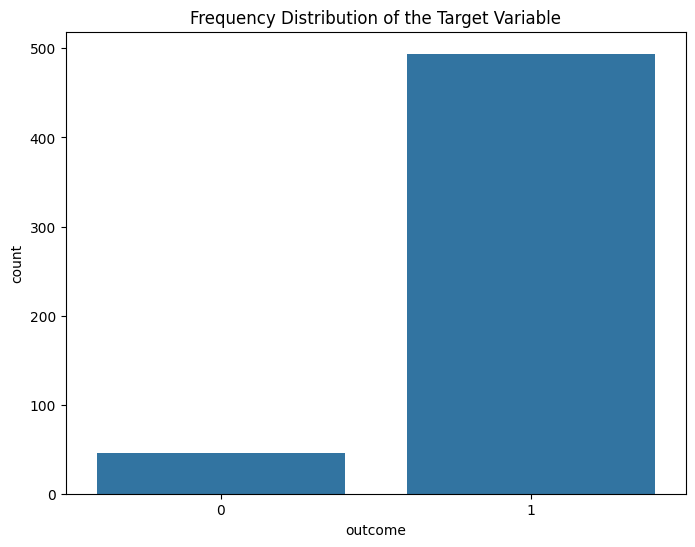

In [16]:
# outcome is the name of your target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='outcome', data=df)
plt.title('Frequency Distribution of the Target Variable')
plt.show()


In [14]:
#check for collinearity/multicollinearity between features and feature and the target variable, outcome
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3).set_properties(**{'font-size': '7pt'})

<ipython-input-14-a6fe0852d2e6>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3).set_properties(**{'font-size': '7pt'})


,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
vconst_corr,1.000,0.004,0.009,-0.018,0.019,0.002,0.004,-0.013,0.002,0.011,-0.014,-0.009,-0.003,-0.002,-0.002,0.016,-0.017,-0.001,-0.305
vconst_2,0.004,1.000,-0.000,-0.001,-0.008,-0.024,-0.005,0.004,-0.014,-0.011,0.020,0.002,0.003,-0.015,0.004,0.006,0.004,0.009,-0.302
vconst_3,0.009,-0.000,1.000,0.010,0.006,-0.002,0.020,0.004,-0.008,0.007,-0.009,-0.025,-0.021,-0.004,-0.005,-0.001,0.005,-0.001,0.000
vconst_4,-0.018,-0.001,0.010,1.000,0.021,0.022,0.002,-0.002,-0.002,-0.005,0.018,-0.010,-0.007,0.020,-0.001,-0.009,-0.017,0.005,0.072
vconst_5,0.019,-0.008,0.006,0.021,1.000,0.006,-0.003,0.012,0.004,0.001,0.021,-0.016,0.021,0.010,-0.019,-0.021,-0.009,0.012,0.054
vconst_7,0.002,-0.024,-0.002,0.022,0.006,1.000,-0.017,-0.022,0.001,0.015,0.000,0.015,0.007,-0.004,-0.008,-0.007,0.013,0.008,0.049
ah_corr,0.004,-0.005,0.020,0.002,-0.003,-0.017,1.000,-0.035,-0.005,0.010,-0.007,0.017,0.003,0.012,-0.003,0.007,0.002,-0.002,0.017
ah_bolus,-0.013,0.004,0.004,-0.002,0.012,-0.022,-0.035,1.000,-0.009,0.012,0.012,-0.004,-0.019,-0.011,0.005,0.032,0.000,0.007,0.004
slm_corr,0.002,-0.014,-0.008,-0.002,0.004,0.001,-0.005,-0.009,1.000,0.009,0.003,0.002,0.003,-0.003,0.006,-0.008,-0.002,0.014,0.049
efficiency_factor,0.011,-0.011,0.007,-0.005,0.001,0.015,0.010,0.012,0.009,1.000,-0.018,0.018,0.012,-0.034,0.003,0.010,-0.005,-0.004,-0.032
